In [115]:
# Import kebutuhan Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import data 
data = pd.read_csv('DATA.csv')

# pilih data dimana data_x adalah nilai dari kolom X1 sampai X5, data_y adalah data target class
data_x = data.loc[:,'X1':'X5']
data_y = data.Class

# pisahkan data menjadi 4 variabel dimana akan digunakan sebagai data train dan data test
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20)


# fungsi menampilkan data train dan data 
def tampil_data(x_test, y_test, x_train, y_train):
    print("-------- Data Test --------")
    display(pd.concat([x_test, y_test], axis=1))
    print("-------- Data Train --------")
    display(pd.concat([x_train, y_train], axis=1))

    
# fungsi mencari nilai K untuk KNN, dimana K akan dicari dengan mengetes angka 1 - 40.
def cari_k():
    error = []
    for i in range(1, 40):  
        knn_test_error = KNeighborsClassifier(n_neighbors=i)
        knn_test_error.fit(x_train, y_train)
        pred_i = knn_test_error.predict(x_test)
        error.append(np.mean(pred_i != y_test))

# fungsi menampilkan 'hasil fungsi mencari nilai K'
def tampil_k():
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=5)
    plt.title('Error Rate Nilai K')  
    plt.xlabel('Nilai K')  
    plt.ylabel('Error rata-rata')
    
# fungsi perhitungan KNN menggunakan data training dan data test, dimana nilai K diambil dari Nilai error terkecil
# maka K adalah 3
def cek_k():
    knn = KNeighborsClassifier(3).fit(x_train,y_train)
    for y_prediksi,y_target in zip(knn.predict(x_test),y_test):
        print('{:>5}'.format('Hasil x_test prediksi adalah'),'{:15}'.format(y_prediksi),'{:5}'.format('---'),
             '{:>5}'.format('y_test sebenarnya adalah'), '{:>5}'.format(y_target))
        
    hasil = knn.score(x_test,y_test) 
    print('Nilai Akurasi = '+ str(hasil*100) +' %')
    
# fungsi dimana mencari class prediksi dengan nilai kustom
def prediksi_nilai_baru():
    knn_prediksi = KNeighborsClassifier(n_neighbors=3)
    knn_prediksi.fit(x_train,y_train)
    
    nilai = np.array([[0.9,0.021,0.01,0.555,0.2]])
    hasil = knn_prediksi.predict(nilai)
    print('Prediksi KNN dengan Nilai baru')
    print('X1 = '+str(nilai[0][0]))
    print('X2 = '+str(nilai[0][1]))
    print('X3 = '+str(nilai[0][2]))
    print('X4 = '+str(nilai[0][3]))
    print('X5 = '+str(nilai[0][4]))
    print('')
    
    print('Dari nilai diatas, diprediksi hasil class yaitu ' + hasil)

In [116]:
tampil_data(x_test, y_test, x_train, y_train)

-------- Data Test --------


,X1,X2,X3,X4,X5,Class
59,0.38,0.013,0.010,0.810,0.101,Bankcrupt
52,0.04,0.027,0.023,13.589,0.122,Non Bankcrupt
56,0.03,0.033,0.024,4.922,0.166,Non Bankcrupt
16,0.22,0.019,0.015,0.433,0.120,Bankcrupt
57,0.62,0.008,0.003,0.162,0.096,Bankcrupt
25,0.62,0.022,0.015,73.165,0.148,Non Bankcrupt
9,0.89,0.011,0.007,0.455,0.100,Grey Area
37,0.08,0.016,0.014,0.006,0.111,Bankcrupt
32,0.24,0.004,0.044,4.829,0.094,Non Bankcrupt
18,0.05,0.025,0.014,1.112,0.163,Bankcrupt


-------- Data Train --------


,X1,X2,X3,X4,X5,Class
0,0.46,0.002,0.002,0.023,0.098,Bankcrupt
50,0.12,0.015,0.014,1.283,0.092,Bankcrupt
35,0.05,0.031,0.020,11.273,0.095,Non Bankcrupt
5,0.13,0.013,0.010,9.877,0.092,Non Bankcrupt
7,0.96,0.014,0.012,1.752,0.096,Grey Area
28,0.82,0.006,-0.001,0.398,0.129,Grey Area
39,0.08,0.009,0.006,1.167,0.100,Bankcrupt
58,0.52,0.009,0.006,2.442,0.106,Grey Area
19,0.09,0.028,0.016,19.934,0.188,Non Bankcrupt
14,0.08,0.032,0.026,9.444,0.086,Non Bankcrupt


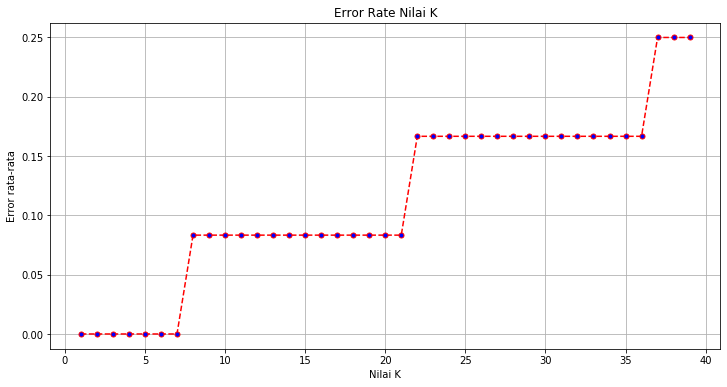

In [117]:
cari_k()
tampil_k()

In [118]:
cek_k()

Hasil x_test prediksi adalah Bankcrupt       ---   y_test sebenarnya adalah Bankcrupt
Hasil x_test prediksi adalah Non Bankcrupt   ---   y_test sebenarnya adalah Non Bankcrupt
Hasil x_test prediksi adalah Non Bankcrupt   ---   y_test sebenarnya adalah Non Bankcrupt
Hasil x_test prediksi adalah Bankcrupt       ---   y_test sebenarnya adalah Bankcrupt
Hasil x_test prediksi adalah Bankcrupt       ---   y_test sebenarnya adalah Bankcrupt
Hasil x_test prediksi adalah Non Bankcrupt   ---   y_test sebenarnya adalah Non Bankcrupt
Hasil x_test prediksi adalah Grey Area       ---   y_test sebenarnya adalah Grey Area
Hasil x_test prediksi adalah Bankcrupt       ---   y_test sebenarnya adalah Bankcrupt
Hasil x_test prediksi adalah Non Bankcrupt   ---   y_test sebenarnya adalah Non Bankcrupt
Hasil x_test prediksi adalah Bankcrupt       ---   y_test sebenarnya adalah Bankcrupt
Hasil x_test prediksi adalah Grey Area       ---   y_test sebenarnya adalah Grey Area
Hasil x_test prediksi adalah Non Bankc

In [119]:
prediksi_nilai_baru()

Prediksi KNN dengan Nilai baru
X1 = 0.9
X2 = 0.021
X3 = 0.01
X4 = 0.555
X5 = 0.2

['Dari nilai diatas, diprediksi hasil class yaitu Grey Area']
